# CSC529 Assignment 4
## Matt Triano

In [102]:
# General Utility
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import warnings
from IPython.display import display
from IPython.display import Image
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.pipeline import Pipeline

# Model Building
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Performance Evaluation
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Style
g_cmap = sns.light_palette('seagreen', n_colors=10, as_cmap=True)

In [2]:
data_raw = pd.read_csv('spambase.csv')
spam_labels = data_raw['spam']
data_df = data_raw.drop('spam', axis=1)
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data_df)
display(data_df.head(5))
display(spam_labels.head(5))
display(data_raw.shape)

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,wf_conference,cf_;,cf_(,cf_[,cf_!,cf_$,cf_#,crl_average,crl_longest,crl_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

(4601, 58)

In [3]:
data_raw.describe()

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,...,cf_;,cf_(,cf_[,cf_!,cf_$,cf_#,crl_average,crl_longest,crl_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


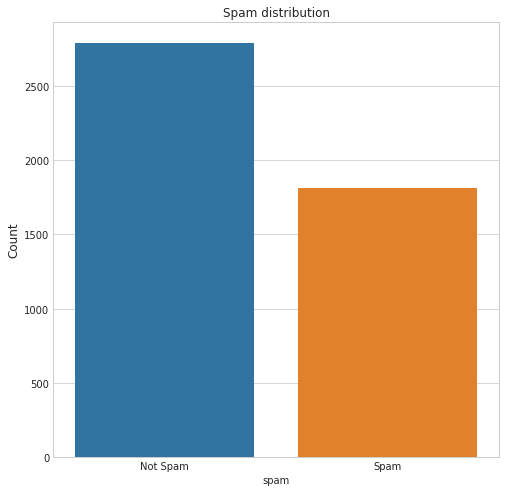

In [4]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax0 = plt.subplots(nrows=1, ncols=1,figsize=(8,8))
    sns.countplot(x='spam', data=data_raw, ax=ax0)
    ax0.set_ylabel('Count', fontsize=12)
    ax0.set_xticklabels(['Not Spam', 'Spam'])    
    ax0.set_title('Spam distribution')

In [3]:
def print_clf_grid_stats(grid_clf, gamma=False, wantPrint=True):
    print('C value that produces the most accurate model: {}'.format(grid_clf.best_params_))
    print('Score of the most accurate model: {:.6f} \n'.format(grid_clf.best_score_))
    means = grid_clf.cv_results_['mean_test_score']
    stdevs = grid_clf.cv_results_['std_test_score']
    c_list_ = []
    g_list_ = []
    if wantPrint:
        print('   --- Mean accuracy (+/- standard deviation) for different C values ---')
    for mean, stdev, param in zip(means, stdevs, grid_clf.cv_results_['params']):
        c_list_.append(param['C'])
        if gamma:
            g_list_.append(param['gamma'])
        if wantPrint:
            print('{:0.3f} (+/- {:0.3f}) for the model with parameters {}'
                  .format(mean, stdev, param))
    return means, stdevs, c_list_, g_list_

In [4]:
# Apparently Seaborn's tsplot will be deprecated, so I made just made a similar
#  plot using matplotlib (Seaborn is just a nice wrapper for matplotlib anyway)
def errorbar_lineplot(ax, x, y, stdev, **kw):
    c_intervals = (y - stdev, y + stdev)
    ax.fill_between(x, c_intervals[0], c_intervals[1], alpha=0.2, **kw)
    ax.plot(x, y, **kw)

In [113]:
g_cmap = sns.light_palette('seagreen', n_colors=10, as_cmap=True)
def confusion_mat_plotter(cfn_matrix, class_labels, title, ax, cmap=g_cmap):
    sns.heatmap(cfn_matrix.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=class_labels, yticklabels=class_labels, ax=ax, cmap=g_cmap)
    ax.set_xlabel('True Class')
    ax.set_ylabel('Predicted Class')
    ax.set_title('Confusion Matrix ' + title)

In [112]:
def evaluator(clf_, data_, labels_,  clf_type, cv_runs_=30, seed=1234):
    cfns = np.zeros((2,2), dtype=int)
    rng = np.random.RandomState(seed)
    random_seeds = rng.randint(low=0, high=99999, size=cv_runs_)
    with plt.style.context('seaborn-whitegrid'):
        fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(11,10))
        
    for i in range(cv_runs_):
        d_train, d_test, cls_train, cls_test = \
                    train_test_split(data_, labels_, random_state=random_seeds[i])
        clf_.fit(d_train, cls_train)
        preds_ = clf_.predict(d_test)
        cfn_ = confusion_matrix(cls_test, preds_, [0,1])
        cfns = cfns + cfn_
    
    # Plotting the average Confusion Matrix
    cfns = cfns//i
    cfn_title = '{} Confusion Matrix Averaged over {:2d} folds '.format(clf_type, cv_runs_)
    confusion_mat_plotter(cfns, [0,1], cfn_title, ax)

# Problem 1: Spam Identification 

In terms of our email communications, **spam** is the **noise** that we want to separate from the valuable **signal** of real communications that the email account owner probably should see. It's while it's irritating to have to delete spam from our inbox, it can be extremely costly (ie lost business, missed connections, reputational damage, etc) to miss real communications. Consequently, the true measure of performance here is recall.

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

## SVC Explorations

GridSearchCV builds models with all of the combinations of values enumerated in the param_... variable and includes performance information and model specifications in its output. Through an iterative process of expanding parameter windows (when a best model use a parameter at one extreme of its given range) and then increasing parameter resolution when a rough best value is identified.

### Linear Kernel SVC 

In [22]:
param_lin = [
  {'C': [5e-05, 5e-04, 1e-03, 5e-03, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
         0.08, 0.09, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1, 1.5, 2, 5, 10, 20],
  'loss': ['hinge']}
]
svm_clf = LinearSVC()

In [23]:
svm_lin_clf_grid = GridSearchCV(svm_clf, param_lin, verbose=9, cv=10, n_jobs=-1)

%time svm_lin_clf_grid.fit(scaled_data_df, spam_labels.values)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:   11.4s


Wall time: 16.4 s


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   16.0s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'loss': ['hinge'], 'C': [5e-05, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1, 1.5, 2, 5, 10, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=9)

In [24]:
lin_means, lin_stdevs, lin_Cs,_ = print_clf_grid_stats(svm_lin_clf_grid,
                                                      wantPrint=True)
# svm_lin_clf_grid.best_params_
# svm_lin_clf_grid.cv_results_['param_linsvm_clf__C']

C value that produces the most accurate model: {'loss': 'hinge', 'C': 0.03}
Score of the most accurate model: 0.921539 

   --- Mean accuracy (+/- standard deviation) for different C values ---
0.891 (+/- 0.044) for the model with parameters {'loss': 'hinge', 'C': 5e-05}
0.887 (+/- 0.027) for the model with parameters {'loss': 'hinge', 'C': 0.0005}
0.895 (+/- 0.023) for the model with parameters {'loss': 'hinge', 'C': 0.001}
0.912 (+/- 0.019) for the model with parameters {'loss': 'hinge', 'C': 0.005}
0.915 (+/- 0.021) for the model with parameters {'loss': 'hinge', 'C': 0.01}
0.918 (+/- 0.022) for the model with parameters {'loss': 'hinge', 'C': 0.02}
0.922 (+/- 0.023) for the model with parameters {'loss': 'hinge', 'C': 0.03}
0.912 (+/- 0.028) for the model with parameters {'loss': 'hinge', 'C': 0.04}
0.913 (+/- 0.028) for the model with parameters {'loss': 'hinge', 'C': 0.05}
0.912 (+/- 0.030) for the model with parameters {'loss': 'hinge', 'C': 0.06}
0.913 (+/- 0.030) for the model

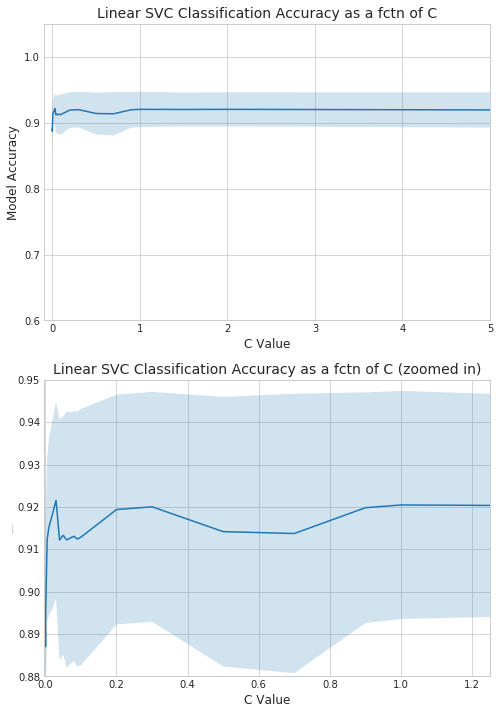

In [25]:
with plt.style.context('seaborn-whitegrid'):
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=False, figsize=(8,12))
    errorbar_lineplot(ax1, lin_Cs, lin_means, lin_stdevs)
    ax1.set_xlabel('C Value', fontsize=12)
    ax1.set_ylabel('Model Accuracy', fontsize=12)
    ax1.set_ylim([0.6,1.05])
    ax1.set_xlim([-0.1,5])
    ax1.set_title('Linear SVC Classification Accuracy as a fctn of C', fontsize=14)
    errorbar_lineplot(ax2, lin_Cs, lin_means, lin_stdevs)
    ax2.set_xlabel('C Value', fontsize=12)
    ax2.set_ylabel('Model Accuracy', fontsize=1)
    ax2.set_ylim([0.88,0.95])
    ax2.set_xlim([-0.005,1.25])
    ax2.set_title('Linear SVC Classification Accuracy as a fctn of C (zoomed in)', fontsize=14)

In [26]:
print('Param values that produces the most accurate model:\n    {}'
          .format(svm_lin_clf_grid.best_params_))
print('Score of the most accurate model:\n    {:.6f} \n'
          .format(svm_lin_clf_grid.best_score_))

Param values that produces the most accurate model:
    {'loss': 'hinge', 'C': 0.03}
Score of the most accurate model:
    0.921539 



In [28]:
best_lin_svm_clf = LinearSVC(C=0.003, loss='hinge')

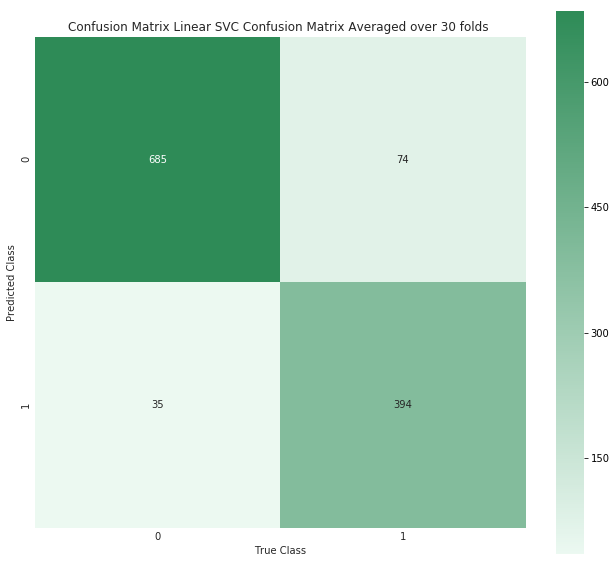

In [60]:
evaluator(best_lin_svm_clf, scaled_data_df, spam_labels.values, 'Linear SVC')

$$\text{Linear SVC Recall} = \frac{394}{394+74} = 0.842$$

In [77]:
dat_train, dat_test, cls_train, cls_test = train_test_split(scaled_data_df, 
                                                            spam_labels.values, 
                                                            test_size=0.34, 
                                                            random_state=1234)

In [81]:
best_lin_svm_clf.fit(dat_train, cls_train)
preds = best_lin_svm_clf.predict(dat_test)
cfn_mat = confusion_matrix(cls_test, preds)

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
    confusion_mat_plotter(cfn_mat, )

In [ ]:
preds_ = clf_.predict(d_test_sm)
cfn_ = confusion_matrix(cls_test_sm, preds_, [0,1])


### Gaussian Kernel SVC

In [142]:
param_rbf = [
  {'C': [0.01, 0.1, 1, 10, 35, 50, 65, 100, 250, 500], 
   'gamma': [5e-05, 1e-04, 5e-04, 1e-03, 5e-03, 0.01, 0.05, 0.1, 0.5]
  }]
rbf_svm_clf = SVC()

In [143]:
svm_rbf_clf_grid = GridSearchCV(rbf_svm_clf, param_rbf, verbose=9, cv=3, n_jobs=-1)

%time svm_rbf_clf_grid.fit(scaled_data_df, spam_labels)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.2min finished


Wall time: 1min 14s


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 35, 50, 65, 100, 250, 500], 'gamma': [5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=9)

In [147]:
rbf_means, rbf_stdevs, rbf_Cs, rbf_gammas = \
                                print_clf_grid_stats(svm_rbf_clf_grid, 
                                                     gamma=True, 
                                                     wantPrint=False)

C value that produces the most accurate model: {'C': 50, 'gamma': 0.001}
Score of the most accurate model: 0.926538 



In [145]:
gamma2sigma = lambda x: np.sqrt(1/(2*x))
sigmafier = np.vectorize(gamma2sigma)
sigma_list = sigmafier(rbf_gammas)

In [149]:
rbf_dict = {'mean_test_acc': svm_rbf_clf_grid.cv_results_['mean_test_score'], 
             'mean_train_acc': svm_rbf_clf_grid.cv_results_['mean_train_score'], 
             'sigma': sigmafier(svm_rbf_clf_grid.cv_results_['param_gamma'].data),
             'C': svm_rbf_clf_grid.cv_results_['param_C'].data}
rbf_df = pd.DataFrame(rbf_dict)

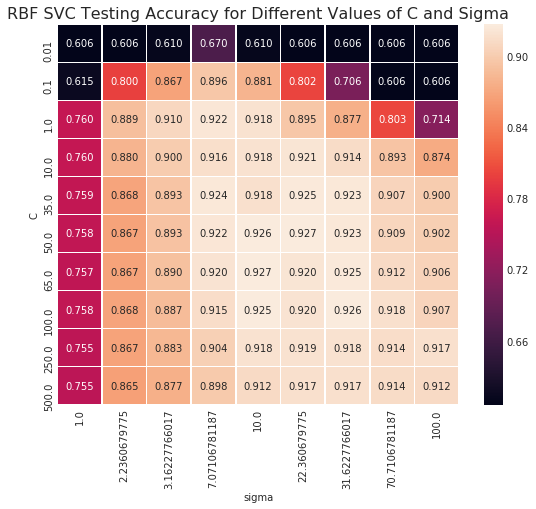

In [154]:
rbf_piv = rbf_df.pivot(index='C', values='mean_test_acc', columns='sigma')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
    ax = sns.heatmap(rbf_piv, linewidths=0.5, annot=True, fmt='0.3f')
    ax.set_title('RBF SVC Testing Accuracy for Different Values of C and Sigma', fontsize=16)

### Gaussian SVC Testing and Training Accuracy by Parameters

Looking above, we see that the best testing accuracies are from models with a moderately relaxed error acceptance $\text{C} \simeq 50$ and a sigma on the order of $10$. 

Looking below, we see that the training accuracies are exceptional if we relax error acceptance and allow $\text{C} \geq 1$ and choose a sigma on the order of $1$. This is a clear indication of overfitting.

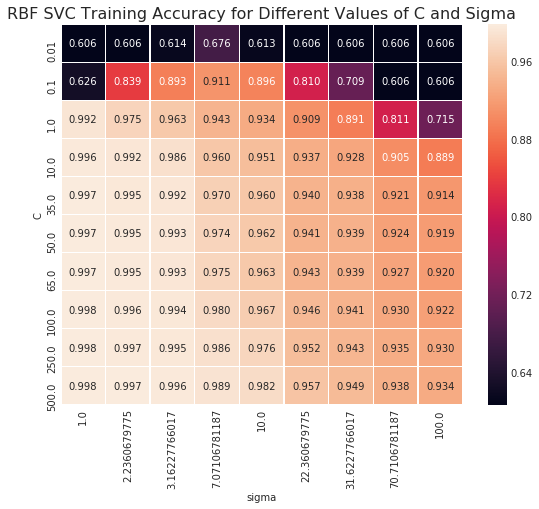

In [155]:
rbf_piv = rbf_df.pivot(index='C', values='mean_train_acc', columns='sigma')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
    ax = sns.heatmap(rbf_piv, linewidths=0.5, annot=True, fmt='0.3f')
    ax.set_title('RBF SVC Training Accuracy for Different Values of C and Sigma', fontsize=16)

In [14]:
print('Param values that produces the most accurate model: {}'
          .format(svm_rbf_clf_grid.best_params_))
print('Score of the most accurate model: {:10.4f}'
          .format(svm_rbf_clf_grid.best_score_))
x=0.001
print('Sigma value for best gamma ({:0.4f}): {:0.4f}'.format(x,np.sqrt(1/(2*x))))

Param values that produces the most accurate model: {'gamma': 0.001, 'C': 50}
Score of the most accurate model:     0.9265
Sigma value for best gamma (0.0010): 22.3607


In [50]:
best_rbf_svm_clf = SVC(kernel='rbf', gamma=0.001, C=50)

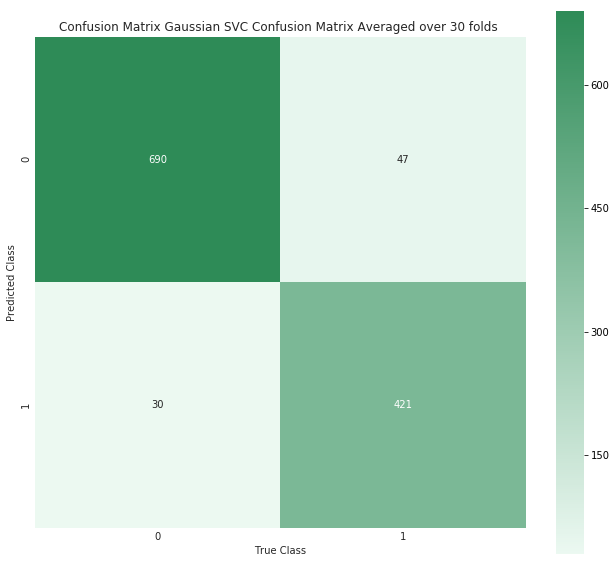

In [61]:
evaluator(best_rbf_svm_clf, scaled_data_df, spam_labels.values, 'Gaussian SVC')

$$\text{Gaussian SVC Recall} = \frac{421}{421+47} = 0.900$$

## Polynomial Kernel SVC

Per the heatmap of results, we see that the best model had an accuracy on $0.918$ with parameters $C=1$ and $Degree=1$.

Aside: I just discovered what Pipeline does and it solves one of my main roadblocks on my final project. If you aren't familiar, you can enter a sequence of preprocessing steps into a Pipeline and it will allow you to automatically keep the testing and training sets isolated even when invoking preprocessing. 

In [132]:
svm_pipe_clf = Pipeline(steps=[('scaler', StandardScaler()),
                               ('svm_clf', SVC())])

In [133]:
param_nonlin = [
    {'svm_clf__kernel': ['poly'],
    'svm_clf__degree': [1,2,3],
    'svm_clf__C': [0.01, 1, 2, 3, 5]}
]

In [134]:
svm_poly_grid = GridSearchCV(svm_pipe_clf, param_nonlin, cv=10, n_jobs=-1, verbose=9)

%time svm_poly_grid.fit(data_df, spam_labels)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


Wall time: 1min 19s


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'svm_clf__kernel': ['poly'], 'svm_clf__degree': [1, 2, 3], 'svm_clf__C': [0.01, 1, 2, 3, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=9)

In [135]:
# svm_poly_grid.cv_results_['param_svm_clf__C'].data
# svm_poly_grid.cv_results_['params']
print('Best Polynomial SVC score: {:0.4f} \nBest Params: {}'
      .format(svm_poly_grid.best_score_, svm_poly_grid.best_params_))

Best Polynomial SVC score: 0.9178 
Best Params: {'svm_clf__kernel': 'poly', 'svm_clf__degree': 1, 'svm_clf__C': 1}


In [139]:
poly_dict = {'mean_test_acc': svm_poly_grid.cv_results_['mean_test_score'], 
             'mean_train_acc': svm_poly_grid.cv_results_['mean_train_score'], 
             'degree': svm_poly_grid.cv_results_['param_svm_clf__degree'].data,
             'C': svm_poly_grid.cv_results_['param_svm_clf__C'].data}
poly_df = pd.DataFrame(poly_dict)

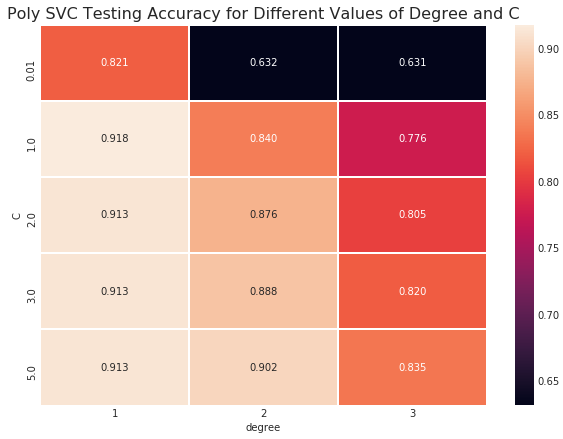

In [140]:
poly_piv = poly_df.pivot(index='C', values='mean_test_acc', columns='degree')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(10,7))
    ax = sns.heatmap(poly_piv, linewidths=0.5, annot=True, fmt='0.3f')
    ax.set_title('Poly SVC Testing Accuracy for Different Values of Degree and C', fontsize=16)

### Polynomial SVC Testing and Training Accuracy by Parameters

Looking above, we see that the best testing accuracies are from models of degree $1$ with a slightly relaxed error acceptance $\text{C}$ on the order of $1$. 

Looking below, we see that the training accuracies are only slightly better than the testing accuracies and are strong with roughly the same sets of parameters. The polynomial SVC appears to be more resilient to overfitting.

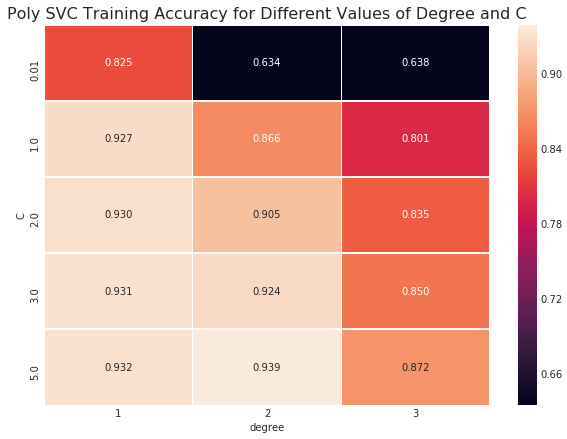

In [141]:
poly_piv = poly_df.pivot(index='C', values='mean_train_acc', columns='degree')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(10,7))
    ax = sns.heatmap(poly_piv, linewidths=0.5, annot=True, fmt='0.3f')
    ax.set_title('Poly SVC Training Accuracy for Different Values of Degree and C', fontsize=16)

In [72]:
print('Param values that produces the most accurate model:\n    {}'
          .format(svm_poly_grid.best_params_))
print('Score of the most accurate model:\n    {:.6f} \n'
          .format(svm_poly_grid.best_score_))

Param values that produces the most accurate model:
    {'svm_clf__C': 1, 'svm_clf__kernel': 'poly', 'svm_clf__degree': 1}
Score of the most accurate model:
    0.917844 



In [73]:
best_poly_pipe_clf = Pipeline(steps=[('scaler', StandardScaler()),
                                     ('svm_clf', SVC(kernel='poly', C=1.0, degree=1))])

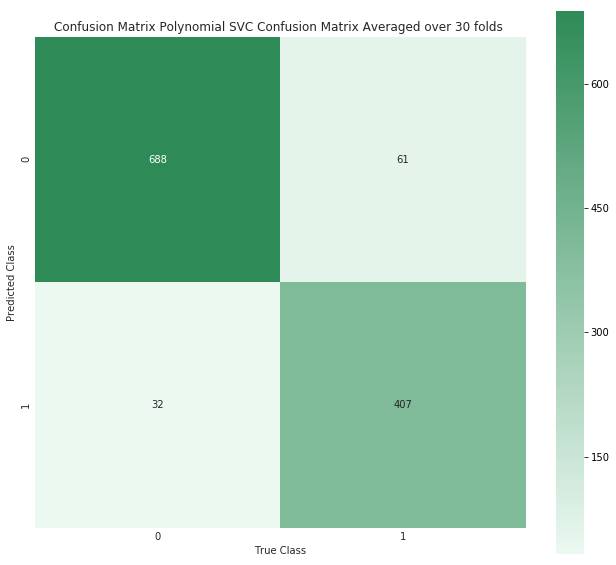

In [74]:
evaluator(best_poly_pipe_clf, scaled_data_df, spam_labels.values, 'Polynomial SVC')

$$\text{Polynomial SVC Recall} = \frac{407}{407+61} = 0.870$$

## 1b: AdaBoost

In [77]:
d_stumps = DecisionTreeClassifier(max_depth=1)

param_ada = {
    'base_estimator': [d_stumps],
    'n_estimators': [100],
    'algorithm': ['SAMME.R'],
    'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6]
}

ada_clf = AdaBoostClassifier(base_estimator=d_stumps)
# ada_clf = ada_clf.fit(X_train, y_train)

In [78]:
ada_clf_grid = GridSearchCV(ada_clf, param_ada, verbose=9, cv=10, n_jobs=-1)

%time ada_clf_grid.fit(scaled_data_df, spam_labels)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   18.7s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   18.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.7s finished


Wall time: 20.9 s


GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6], 'algorithm': ['SAMME.R'], 'n_estimators': [100], 'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, pre

In [101]:
ada_means = ada_clf_grid.cv_results_['mean_test_score']
ada_stdevs = ada_clf_grid.cv_results_['std_test_score']
ada_lrn_rate = ada_clf_grid.cv_results_['param_learning_rate'].data.astype(float)
ada_clf_grid.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'learning_rate': 0.5,
 'n_estimators': 100}

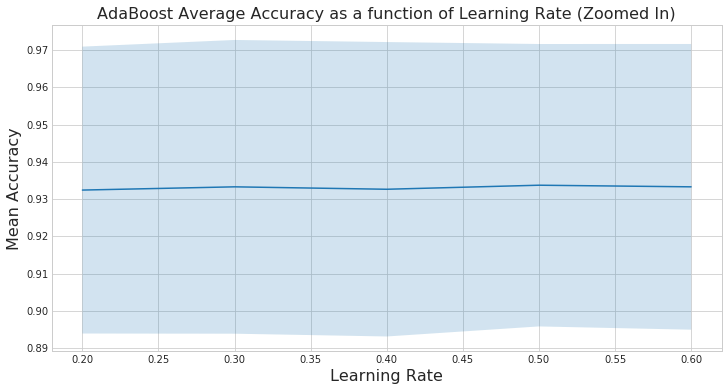

In [81]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(12,6))
    errorbar_lineplot(ax, ada_lrn_rate, ada_means, ada_stdevs)
    ax.set_xlabel('Learning Rate', fontsize=16)
    ax.set_ylabel('Mean Accuracy', fontsize=16)
    ax.set_title('AdaBoost Average Accuracy as a function of Learning Rate (Zoomed In)', fontsize=16)

In [84]:
dat_train, dat_test, cls_train, cls_test = train_test_split(scaled_data_df, 
                                                            spam_labels.values, 
                                                            test_size=0.34, 
                                                            random_state=1234)    

In [85]:
best_ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                  learning_rate=0.5, 
                                  algorithm='SAMME.R', 
                                  n_estimators=500)

In [86]:
best_ada_clf.fit(dat_train, cls_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=500, random_state=None)

In [106]:
n_ests = best_ada_clf.n_estimators
ada_err_train = np.zeros((n_ests,))
recall_train = np.zeros((n_ests,))
ada_err_test = np.zeros((n_ests,))
recall_test = np.zeros((n_ests,))
for i, pred in enumerate(best_ada_clf.staged_predict(dat_test)):
    ada_err_test[i] = zero_one_loss(cls_test, pred)
    recall_test[i] = 1 - recall_score(cls_test, pred)

for i, pred in enumerate(best_ada_clf.staged_predict(dat_train)):
    ada_err_train[i] = zero_one_loss(cls_train, pred)
    recall_train[i] = 1 - recall_score(cls_train, pred)

Referenced this sklearn example in creating this plot. 

http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html

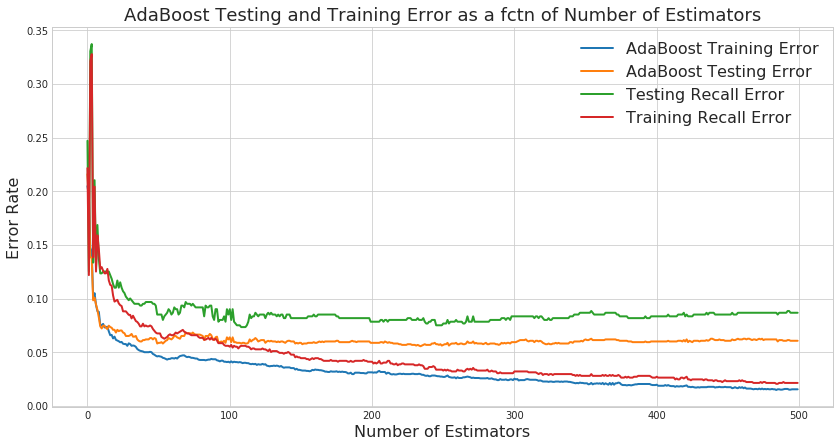

In [110]:
x_ax = np.arange(n_ests)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(14,7))
    ax.plot(x_ax, ada_err_train, label='AdaBoost Training Error', lw=2)
    ax.plot(x_ax, ada_err_test, label='AdaBoost Testing Error', lw=2)
    ax.plot(x_ax, recall_test, label='Testing Recall Error', lw=2)
    ax.plot(x_ax, recall_train, label='Training Recall Error', lw=2)
    ax.legend(loc='upper right', fontsize=16)
    ax.set_xlabel('Number of Estimators', fontsize=16)
    ax.set_ylabel('Error Rate', fontsize=16)
    ax.set_title('AdaBoost Testing and Training Error as a fctn of Number of Estimators',
                fontsize=18)

### AdaBoost Analysis

From the graphs, we see that both the testing recall error and testing total error level out to approximately constant values of $~9\%$ and $~6\%$ (respectively) around 50 estimators, but the training recall error and training total error continue to gradually decrease, indicating overfitting. Per Occam's razor, the simplest model that achieves a given accuracy is the best, so I'll use that as my best classifier. 

In [116]:
best_simp_ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                       learning_rate=0.5, 
                                       algorithm='SAMME.R', 
                                       n_estimators=50)
best_simp_ada_clf.fit(dat_train, cls_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=50, random_state=None)

In [119]:
simp_preds = best_simp_ada_clf.predict(dat_test)
simp_cfn = confusion_matrix(cls_test, simp_preds, [0,1])

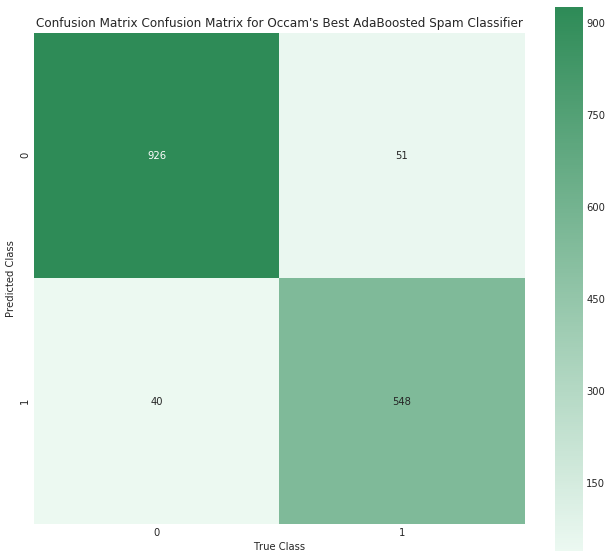

In [120]:
with plt.style.context('seaborn-whitegrid'):
    cfn_title = 'Confusion Matrix for Occam\'s Best AdaBoosted Spam Classifier'
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(11,10))
    confusion_mat_plotter(simp_cfn, [0,1], cfn_title, ax)

$$\text{Occam's AdaBoost Recall} = \frac{548}{548+51} = 0.915$$

## 1c: Preprocessing Testing

I'll compare an RBF SVM Classifier (the best performing SVC in the absence of preprocessing) against AdaBoost under different preprocessing regimes. I'm so glad I discovered Pipeline.

Excellent visual demonstration of the effects of different scalers:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [129]:
param_rbf =   { 
    'svm_clf__C': [0.01, 0.1, 1, 10, 35, 50, 65, 100, 250, 500], 
    'svm_clf__gamma': [5e-05, 1e-04, 5e-04, 1e-03, 5e-03, 0.01, 0.05, 0.1, 0.5]
}

rbf_pipe_clf = Pipeline(steps=[('scaler', StandardScaler()),
                               ('svm_clf', SVC(kernel='rbf'))])

rbf_grid_clf = GridSearchCV(rbf_pipe_clf, param_rbf, n_jobs=-1, verbose=9)

In [130]:
rbf_grid_clf.fit(data_df, spam_labels.values)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svm_clf__gamma': [5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5], 'svm_clf__C': [0.01, 0.1, 1, 10, 35, 50, 65, 100, 250, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=9)

In [158]:
rbf_dict = {'mean_test_acc': rbf_grid_clf.cv_results_['mean_test_score'], 
             'mean_train_acc': rbf_grid_clf.cv_results_['mean_train_score'], 
             'sigma': sigmafier(rbf_grid_clf.cv_results_['param_svm_clf__gamma'].data),
             'C': rbf_grid_clf.cv_results_['param_svm_clf__C'].data}
rbf_df = pd.DataFrame(rbf_dict)

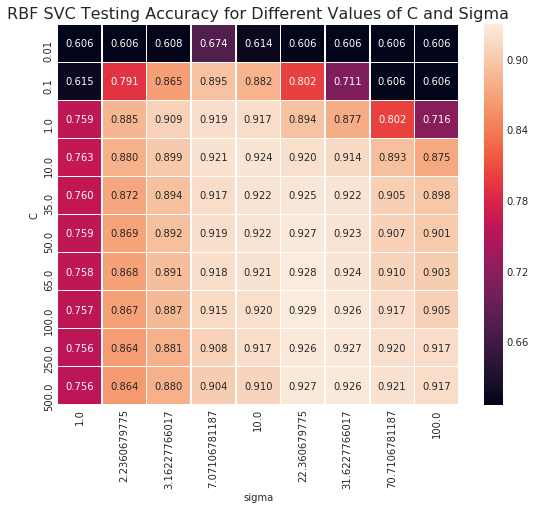

In [161]:
rbf_piv = rbf_df.pivot(index='C', values='mean_test_acc', columns='sigma')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
    ax = sns.heatmap(rbf_piv, linewidths=0.5, annot=True, fmt='0.3f')
    ax.set_title('RBF SVC Testing Accuracy for Different Values of C and Sigma', fontsize=16)

### Gaussian Accuracies with StandardScaler

I just realized that the work above was on a StandardScaled dataset, so there's nothing new here. 

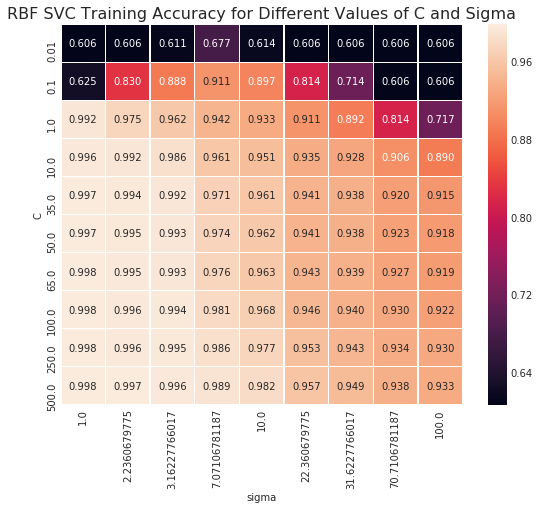

In [162]:
rbf_piv = rbf_df.pivot(index='C', values='mean_train_acc', columns='sigma')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
    ax = sns.heatmap(rbf_piv, linewidths=0.5, annot=True, fmt='0.3f')
    ax.set_title('RBF SVC Training Accuracy for Different Values of C and Sigma', fontsize=16)

In [169]:
param_rbf =   { 
    'svm_clf__C': [0.01, 0.1, 1, 10, 50, 100, 250, 500, 1000], 
    'svm_clf__gamma': [5e-05, 1e-04, 5e-04, 1e-03, 5e-03, 0.01, 0.05, 0.1, 0.5, 0.7]
}

rbf_raw_pipe_clf = Pipeline(steps=[('svm_clf', SVC(kernel='rbf'))])

rbf_raw_grid_clf = GridSearchCV(rbf_raw_pipe_clf, param_rbf, n_jobs=-1, verbose=9)

In [170]:
rbf_raw_grid_clf.fit(data_df, spam_labels.values)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('svm_clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svm_clf__gamma': [5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.7], 'svm_clf__C': [0.01, 0.1, 1, 10, 50, 100, 250, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=9)

In [174]:
grid_clf = rbf_raw_grid_clf
rbf_raw_dict = {'mean_test_acc': grid_clf.cv_results_['mean_test_score'], 
             'mean_train_acc': grid_clf.cv_results_['mean_train_score'], 
             'sigma': sigmafier(grid_clf.cv_results_['param_svm_clf__gamma'].data),
             'C': grid_clf.cv_results_['param_svm_clf__C'].data}
rbf_raw_df = pd.DataFrame(rbf_raw_dict)

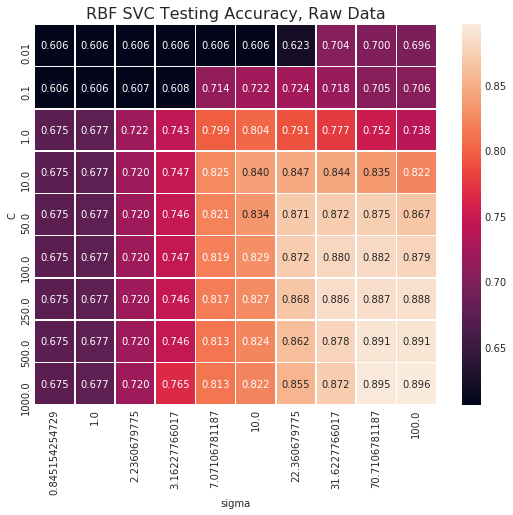

In [175]:
rbf_piv = rbf_raw_df.pivot(index='C', values='mean_test_acc', columns='sigma')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
    ax = sns.heatmap(rbf_piv, linewidths=0.5, annot=True, fmt='0.3f')
    ax.set_title('RBF SVC Testing Accuracy, Raw Data', fontsize=16)

### Gaussian SVC accuracies with raw data

Wow! Scaling made a big difference in terms of parameter score distribution, and from the looks of the training accuracies, overfitting is drastic if you allow the classifier really any room to relax boundaries on the hyperplane. With testing, you have to drastically relax boundaries to achieve decent accuracy.

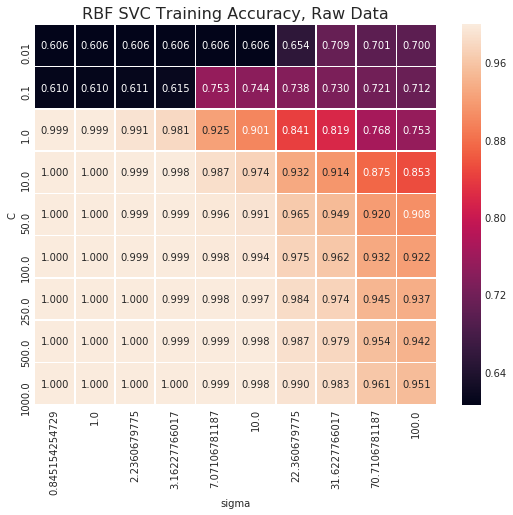

In [176]:
rbf_piv = rbf_raw_df.pivot(index='C', values='mean_train_acc', columns='sigma')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, sharex=False, figsize=(9,7))
    ax = sns.heatmap(rbf_piv, linewidths=0.5, annot=True, fmt='0.3f')
    ax.set_title('RBF SVC Training Accuracy, Raw Data', fontsize=16)

In [50]:
best_raw_rbf_svm_clf = SVC(kernel='rbf', gamma=0.001, C=50)

In [ ]:
# evaluator(rbf_raw_grid_clf, data_df, spam_labels.values, 'Gaussian SVC with Raw Data')

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.4min finished


Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.3min finished


Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.1s


In [ ]:
rbf_raw_grid_clf.best

## 2: Questions

### 2a: Decision Boundaries

A decision boundary is some manifold/surface in the data space that tries to accurately separate datapoints of different classes. 
* In a binary SVM classifier, the hyperplane that divides the bulk of one class from the bulk of another.
* In a decision tree classifier (with binary splits), at every node of the decision tree there is a feature-value ($D_V$) that is used to sort all datapoints on that branch. All datapoints where their value for that feature exceeds $D_V$ go to one branch and all other datapoints fo to the other branch.

### 2b: Bayes Decision Theory

Prior Probability captures the expectation that an observer could reach using the relevant information that was available to them. I frequently use the phrase "prepare to adjust your priors" when presenting new, striking information to the nerds I associate with.

### 2c: Zero-One Loss Function

$$\lambda(\alpha_i|\omega_j) := \left\{
    \begin{array}{rcl}
        0 & \mbox{for} & i = j \\
        1 & \mbox{for} & i \neq j \\
    \end{array} \;\; \mbox{for} \; i,j = 1, ..., c
\right.$$

The **Zero-One Loss Function** states that for any incorrect classification (whether it's a false positive or false negative), the loss is complete ($1$), and for correct classifications, there is no loss ($0$) of accuracy. This is the loss function typically used in binary classifications. 

### 2d: Evaluation Metrics for Probabilistic Classifiers

* **Accuracy Score** reveals the total number of correctly.

* **Confusion Matrices** show the types of misclassification errors a classifier can make. As we saw in the last assignment, confusion matrices are crucial if you're working with highly imbalanced data (let's say $97.32\%$ of the observations are in one class and the remainder in the other), as your classifier may get an accuracy score of $97.32\%$, but it's because it predicts everything will be in the dominant class.

ehh, these aren't probabilistic. 

## Bayesian Networks

### 3a:
$$P(X)*P(Y|X)*P(Z|X,Y)*P(W|X,Y,Z)$$
<img src="3a.PNG" alt="Drawing" style="width: 400px;"/>

### 3b:
$$P(W)*P(X)*P(Y)*P(Z)$$
<img src="3b.PNG" alt="Drawing" style="width: 400px;"/>

### 3c:
$$P(Y)*P(Z|Y)*P(X|Y)*P(W|Y)$$
<img src="3c.PNG" alt="Drawing" style="width: 400px;"/>

### 3d:
$$P(Z|X,Y)*P(X)*P(Y)*P(W|X)$$
<img src="3d.PNG" alt="Drawing" style="width: 400px;"/>

### 3e:
$$P(W|X)*P(X|Y)*P(Y|Z)*P(Z)$$
<img src="3e.PNG" alt="Drawing" style="width: 400px;"/>

### 3f:
$$P(W|X)*P(Y|X)*P(Z|Y)*P(X)$$
<img src="3f.PNG" alt="Drawing" style="width: 400px;"/>

In [ ]:
# LinearSVC().get_params().keys()
# help(sns.countplot)
# <markdown> ![Directed Graph for 3a](3a.png)
# help(AdaBoostClassifier)
# help(DecisionTreeClassifier)
# help(d_stumps)